0.5207515954719953
0.22638108079606892
Train error: 0.0621242885117782
Test error: 0.04286906695830027


Text(0.5, 1.0, 'Error vs. Training Epoch')

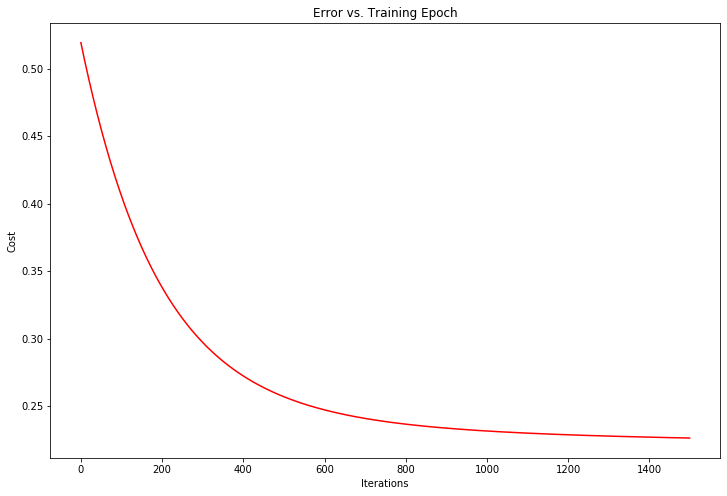

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

def computeCost(X,y,theta,m):
  h = X.dot(theta)
  meansq_error = (h-y)**2
  return 1/(2*m) * np.sum(meansq_error)

def gradientDescent(X,y,theta,alpha,num_iters,m):
  J_history = []
  for i in range(num_iters):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(),(predictions - y))
    descent = alpha * (1/m) * error
    theta -= descent
    J_history.append(computeCost(X,y,theta,m))
  return theta,J_history

def train_error(X,theta,y):
    a = np.dot(X,theta)
    return ((abs(np.sum(a)-np.sum(y)))/len(y))*100

data = pd.read_csv('Real estate.csv',header=None)
data.head()
data.describe()
data=(data-(data.mean()))/(data.std())
data1 = data.values
m2 = len(data1[:,-1])
a = int(m2*0.8)
b = m2 - a
cols=data.shape[1]
X2=data1[0:a,1:cols-1]
y2=data1[0:a,cols-1:cols]
X3=data1[a+1:m2,1:cols-1]
y3=data1[a+1:m2,cols-1:cols]
theta2=np.zeros((X2.shape[1],1))
print(computeCost(X2,y2,theta2,X2.shape[0]))
alpha = 0.001
num_iters = 1500
theta2, J_history2 = gradientDescent(X2,y2,theta2,alpha,num_iters,X2.shape[0])
print(computeCost(X2,y2,theta2,X2.shape[0]))
p = train_error(X2,theta2,y2)
print("Train error:",p)
p1 = train_error(X3,theta2,y3)
print("Test error:",p1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(num_iters),J_history2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')